In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Defining the path to the dataset file on my Google Drive**

In [ ]:
import pandas as pd
dataset_track ='/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv'
churn_data = pd.read_csv(dataset_track)
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Question 1: Using the given dataset. Extract the relevant features that can define a customer churn.**

*Firstly, I am Streamlining the Dataset: Converting Data Types, Dropping Redundant Columns, and Encoding Target Variable*

In [ ]:
# Converting 'TotalCharges' to numeric and handling missing values
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

# Converting 'SeniorCitizen' to object since it is a categorical feature
churn_data['SeniorCitizen'] = churn_data['SeniorCitizen'].astype('object')

# Dropping the 'customerID' column if it exists, as it's not a feature
if 'customerID' in churn_data.columns:
    churn_data = churn_data.drop('customerID', axis=1)

# Encoding the target variable
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})


*Secondly, I am Refining Data Integrity: Separating, Imputing, and Merging Categorical and Numerical Variables*




In [ ]:
# Splitting dataset into categorical and numeric
categorical_data =churn_data.select_dtypes(include=['object'])
numeric_data = churn_data.select_dtypes(exclude=['object'])


#Imputing numeric
imp=SimpleImputer()
imputed_data=imp.fit_transform(numeric_data)
df_numeric =pd.DataFrame(imputed_data, columns=numeric_data.columns)


#Imputing non_numeric (Categorical)
modes = categorical_data.mode().iloc[0]
categorical_data = categorical_data.fillna(modes)

churn_data = pd.concat([df_numeric,categorical_data], axis=1)

In [ ]:
churn_data

,tenure,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1.0,29.85,29.85,0.0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,34.0,56.95,1889.50,0.0,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,2.0,53.85,108.15,1.0,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,45.0,42.30,1840.75,0.0,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,2.0,70.70,151.65,1.0,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.80,1990.50,0.0,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,72.0,103.20,7362.90,0.0,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,11.0,29.60,346.45,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,4.0,74.40,306.60,1.0,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


*Thirdly, I am Encoding and Transforming Categorical Features: Applying Label and One-Hot Encoding Techniques*

In [ ]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling' ]

label_encoder = LabelEncoder()
for column in categorical_cols:
    churn_data[column] = label_encoder.fit_transform(churn_data[column])

columns_to_onehot_encode = ['PaymentMethod','Contract']
churn_data = pd.get_dummies(churn_data, columns=columns_to_onehot_encode)

In [ ]:
churn_data

,tenure,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1.0,29.85,29.85,0.0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,34.0,56.95,1889.50,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,2.0,53.85,108.15,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,45.0,42.30,1840.75,0.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,2.0,70.70,151.65,1.0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.80,1990.50,0.0,1,0,1,1,1,2,...,2,2,1,0,0,0,1,0,1,0
7039,72.0,103.20,7362.90,0.0,0,0,1,1,1,2,...,2,2,1,0,1,0,0,0,1,0
7040,11.0,29.60,346.45,0.0,0,0,1,1,0,1,...,0,0,1,0,0,1,0,1,0,0
7041,4.0,74.40,306.60,1.0,1,1,1,0,1,2,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
import joblib

In [ ]:
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

*Fourthly, I am Selecting Relevant Features: By Preparing the Data, Splitting, and Employing Recursive Feature Elimination with Cross-Validation (RFECV)*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes to ensure they match
X_train.shape, y_train.shape
# Defining the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating the RFECV object
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)
# selected features
selected_features = X_train.columns[rfecv.support_]

In [ ]:
selected_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod_Electronic check',
       'Contract_Month-to-month', 'Contract_Two year'],
      dtype='object')

*Fifthly, I am Standardizing Features: Scaling and Preparing the Selected Features  for Customer Churn Analysis*

In [ ]:
# Now separating the features and target variable again
X = churn_data[selected_features]
y = churn_data['Churn']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

data = pd.concat([X_scaled_df, y], axis=1)

*Finally, I am Extracting the Relevant Features for Customer Churn Analysis*



In [ ]:
data

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,PaperlessBilling,PaymentMethod_Electronic check,Contract_Month-to-month,Contract_Two year,Churn
0,-1.277445,-1.160323,-0.994971,-1.009559,-0.439916,1.034530,-0.654012,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.121405,0.829798,1.406418,0.904184,-0.562975,0.0
1,0.066327,-0.259629,-0.173876,0.990532,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.121405,-1.205113,-0.711026,-1.105970,-0.562975,0.0
2,-1.236724,-0.362660,-0.960399,0.990532,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.121405,0.829798,-0.711026,0.904184,-0.562975,1.0
3,0.514251,-0.746535,-0.195400,0.990532,-0.439916,-0.966622,-0.654012,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.121405,-1.205113,-0.711026,-1.105970,-0.562975,0.0
4,-1.236724,0.197365,-0.941193,-1.009559,-0.439916,-0.966622,-0.654012,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.121405,0.829798,1.406418,0.904184,-0.562975,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0.990532,-0.439916,1.034530,1.529024,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.138411,0.829798,-0.711026,-1.105970,-0.562975,0.0
7039,1.613701,1.277533,2.242808,-1.009559,-0.439916,1.034530,1.529024,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.138411,0.829798,-0.711026,-1.105970,-0.562975,0.0
7040,-0.870241,-1.168632,-0.855182,-1.009559,-0.439916,1.034530,1.529024,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.121405,0.829798,1.406418,0.904184,-0.562975,0.0
7041,-1.155283,0.320338,-0.872777,0.990532,2.273159,1.034530,-0.654012,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.121405,0.829798,-0.711026,0.904184,-0.562975,1.0


**Question 2: Use your EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot.**

*Exploratory Data Analysis (EDA): Visualizing Churn Patterns by Individual Features*

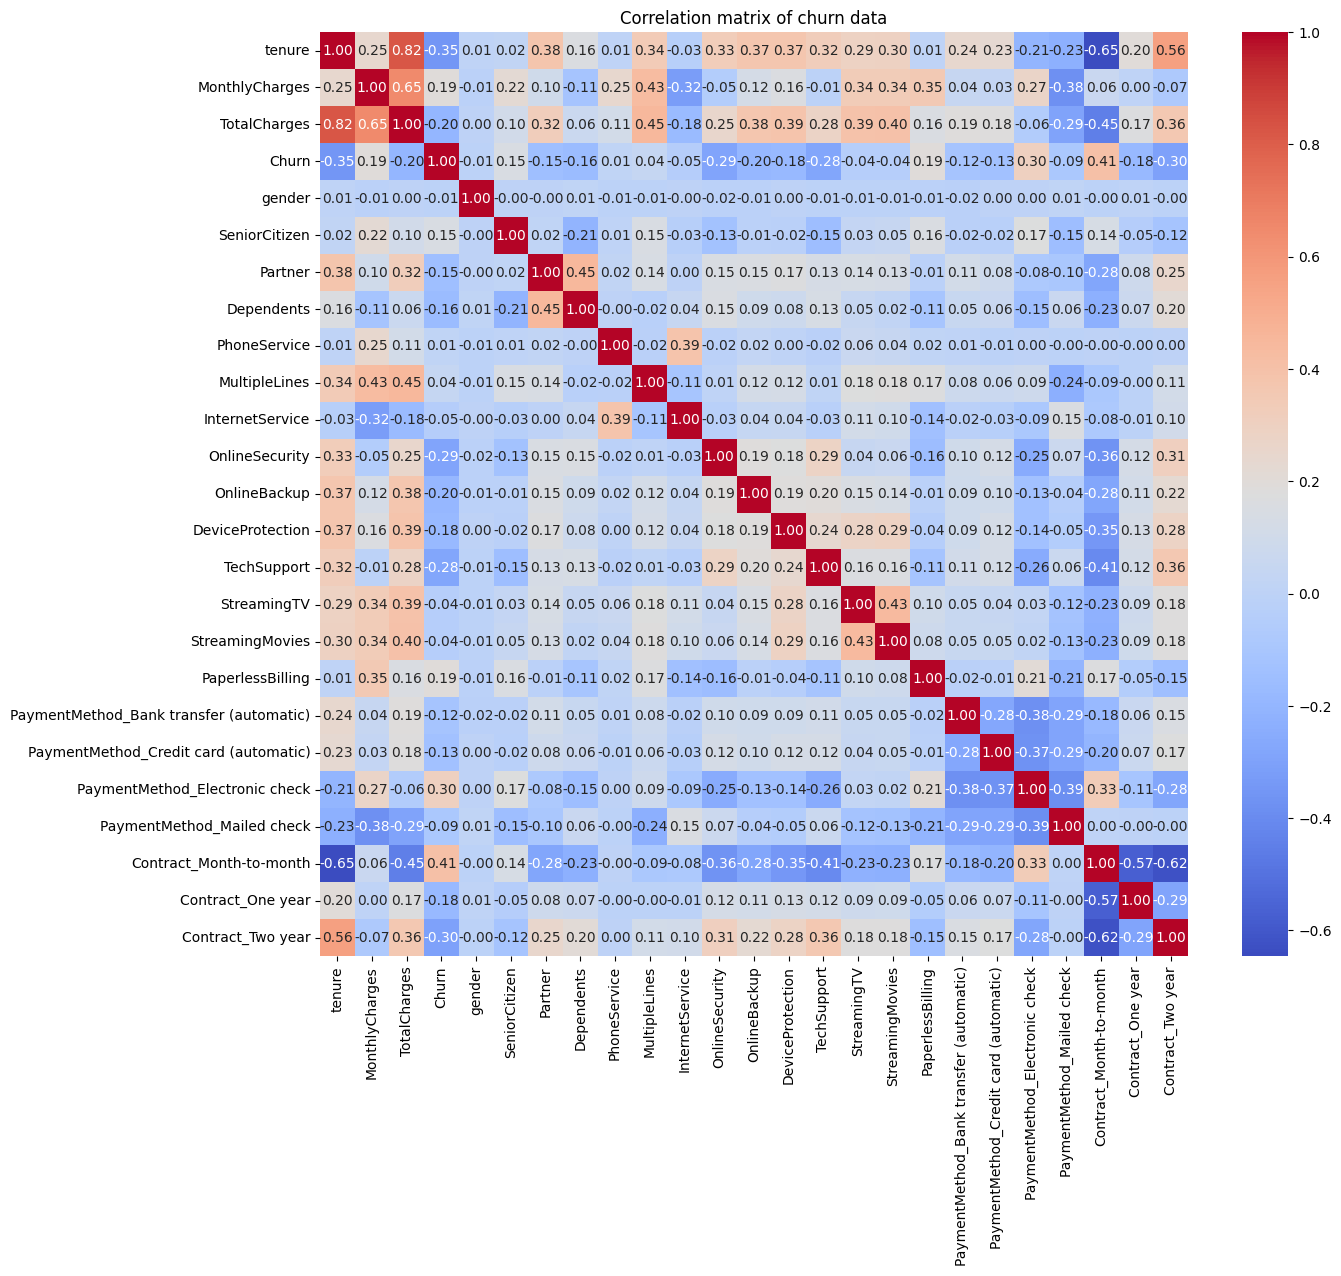

In [ ]:
# First, I am Using heatmap to understand overall correlations, especially those related to 'Churn

# Calculating the correlation matrix
corr = churn_data.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(14, 12))

# Drawing the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of churn data')
plt.show()


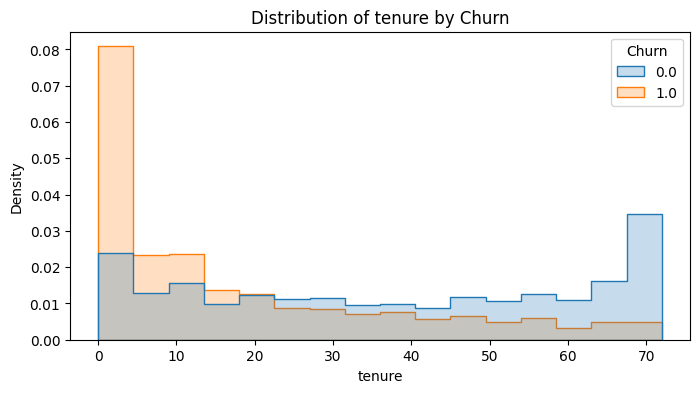

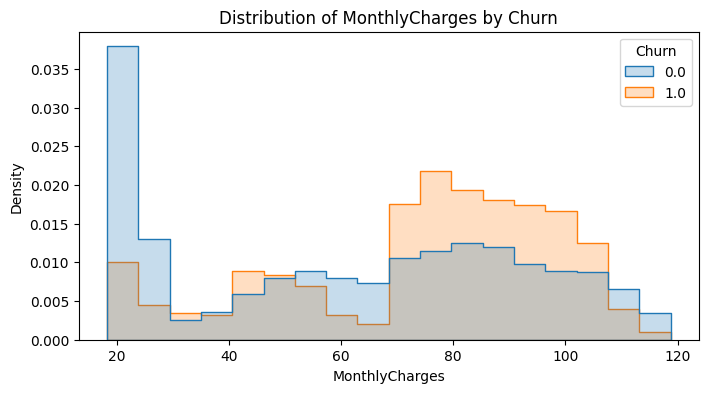

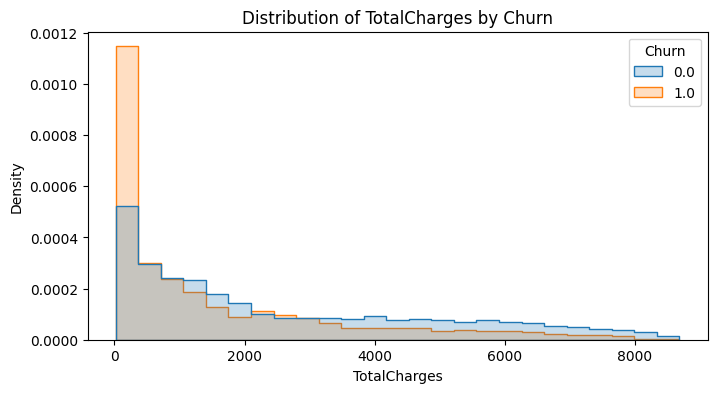

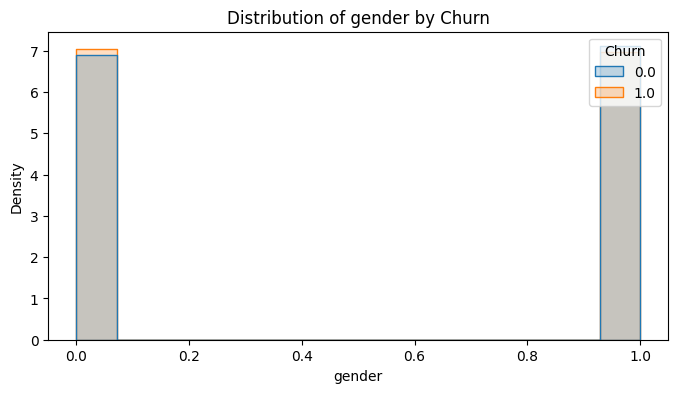

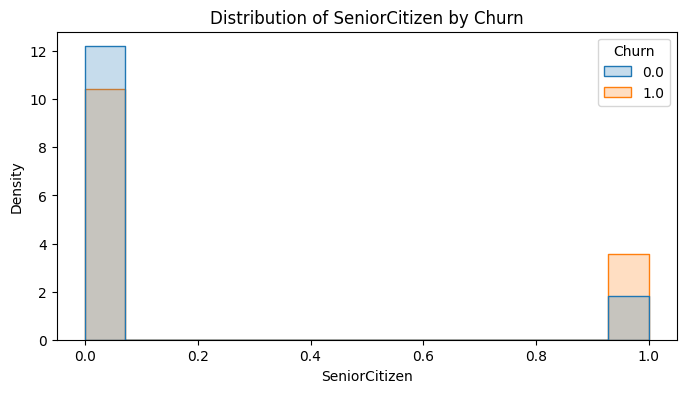

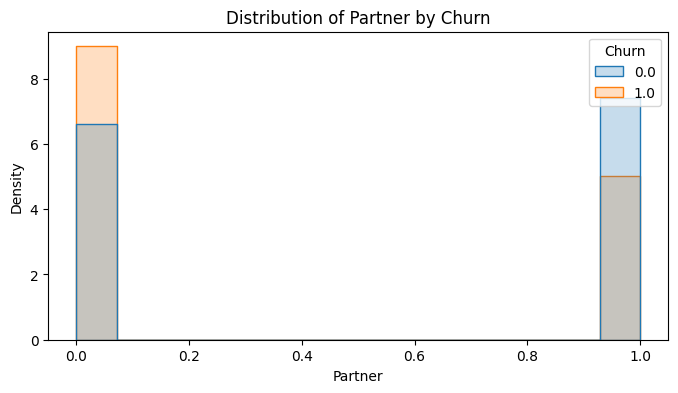

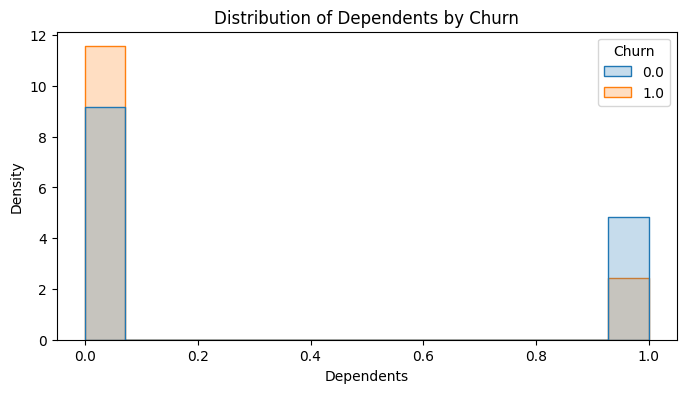

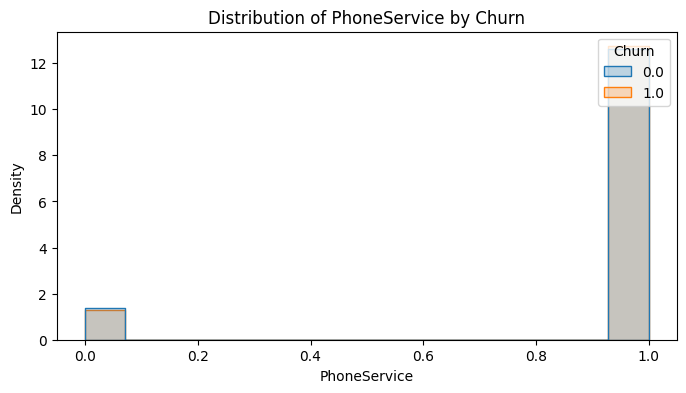

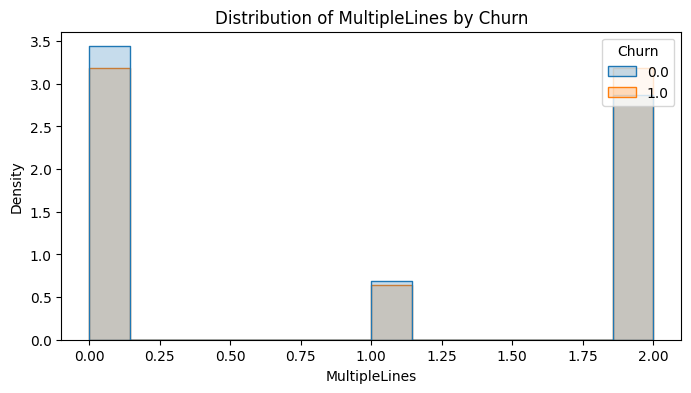

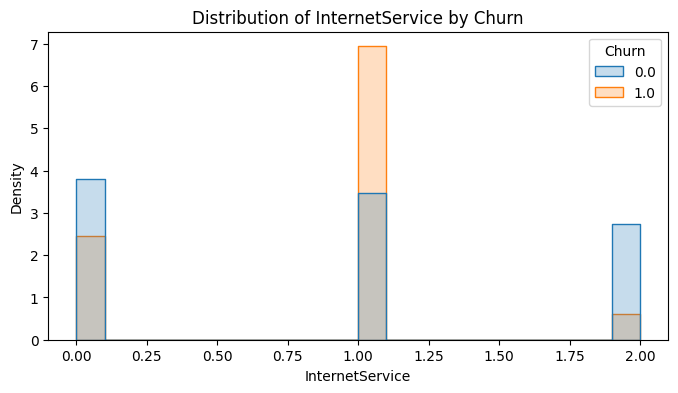

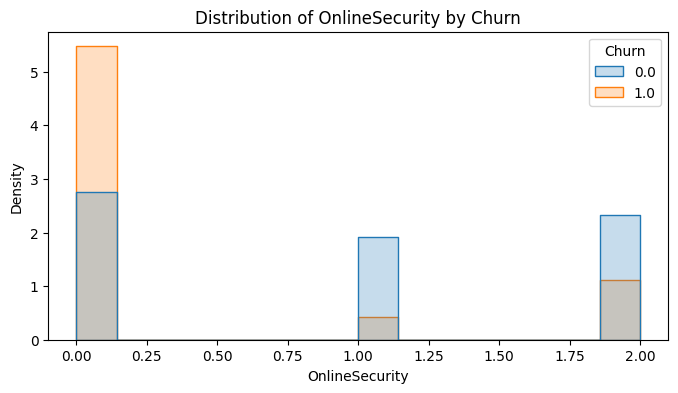

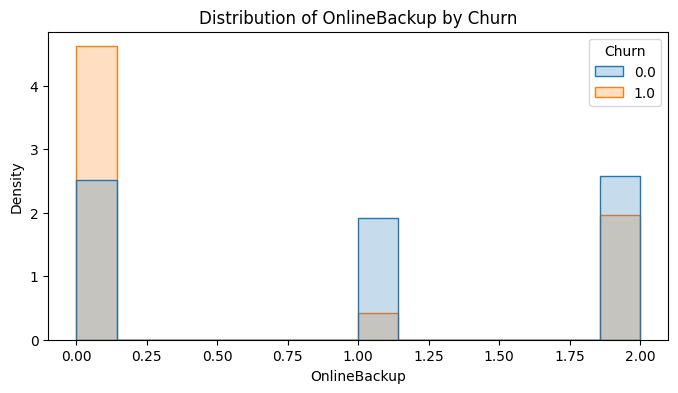

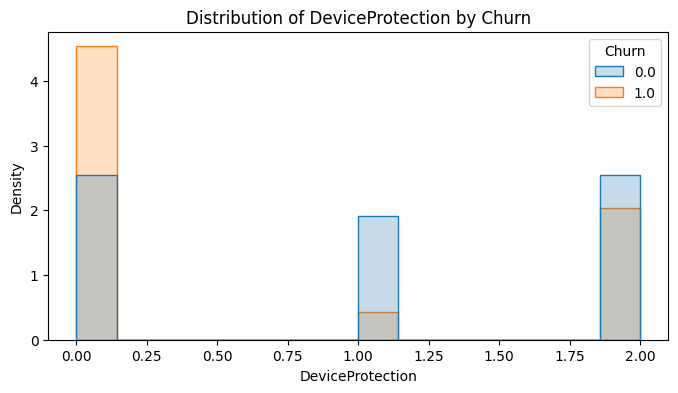

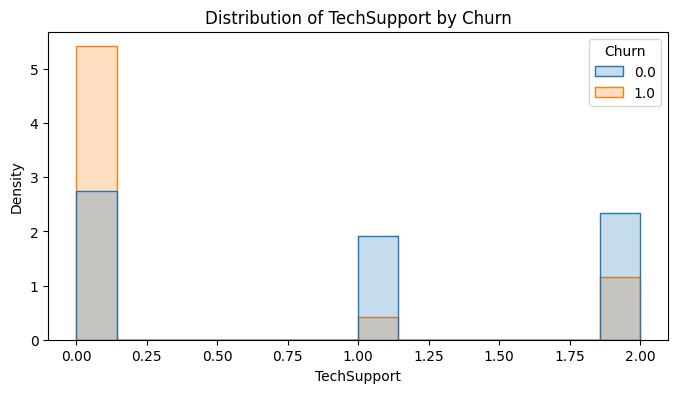

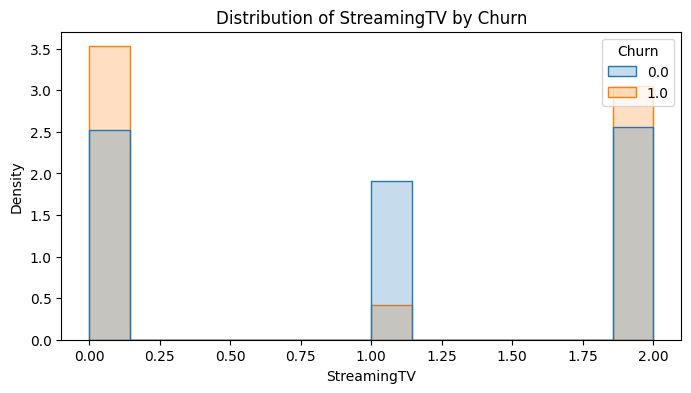

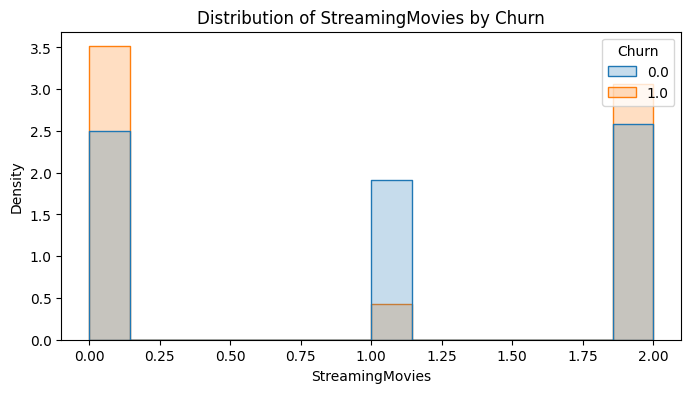

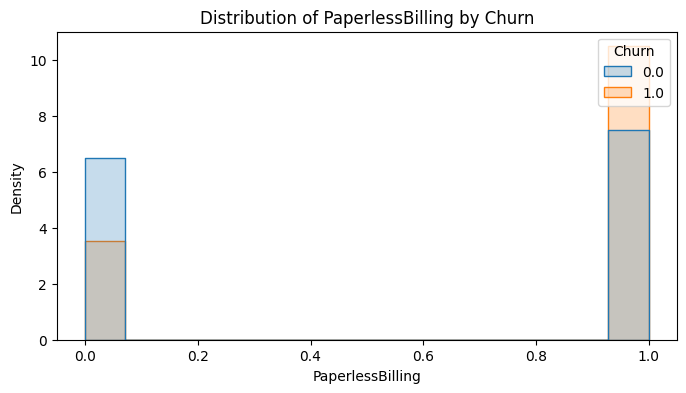

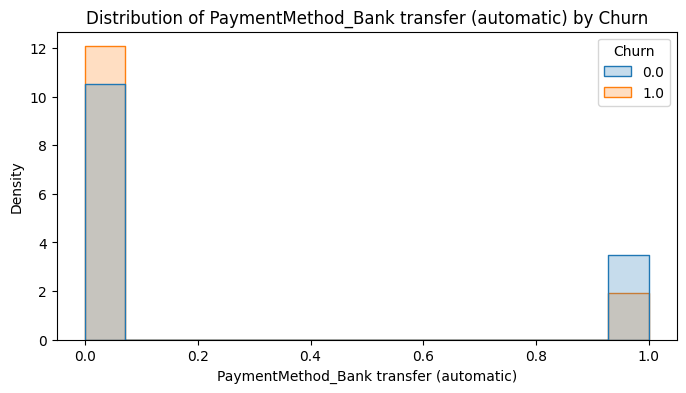

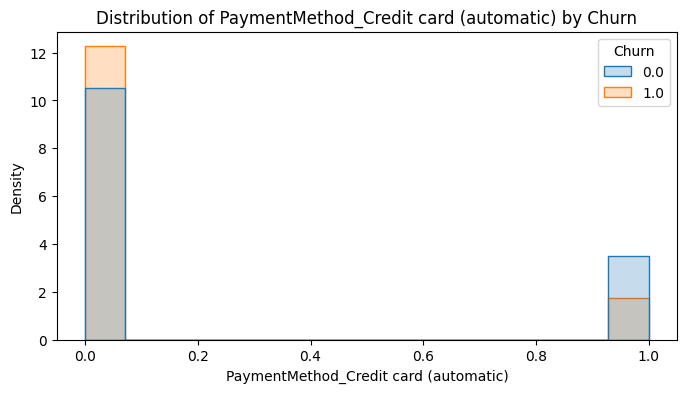

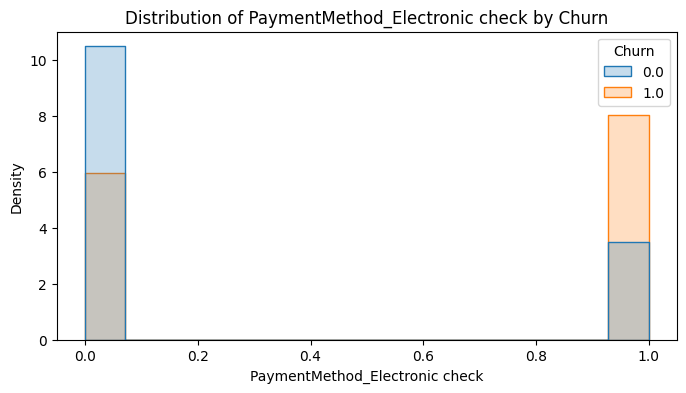

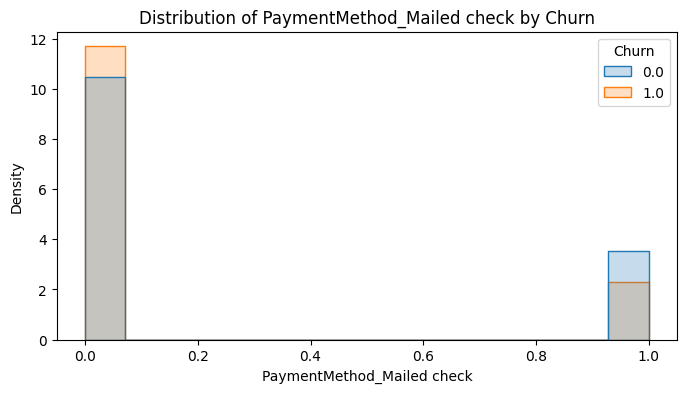

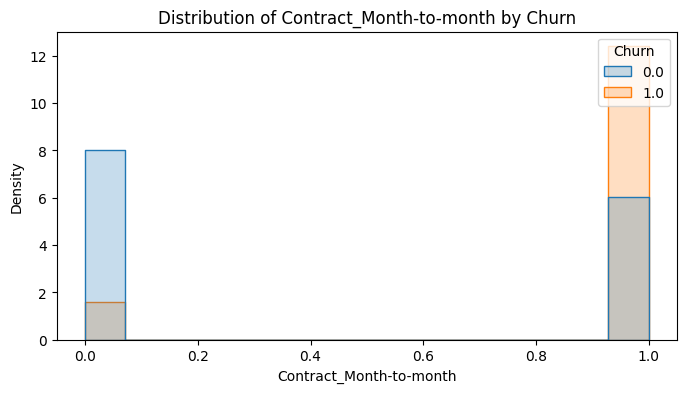

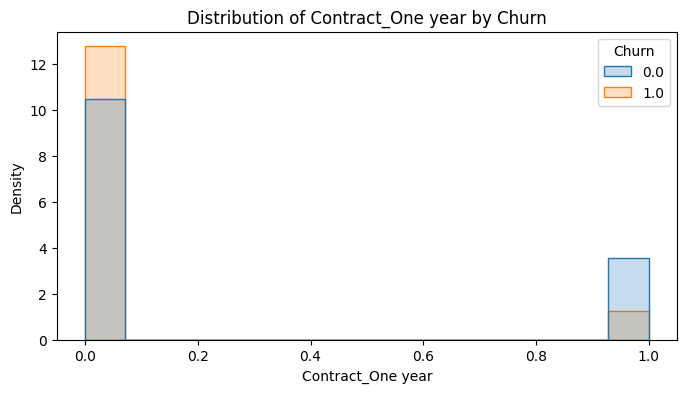

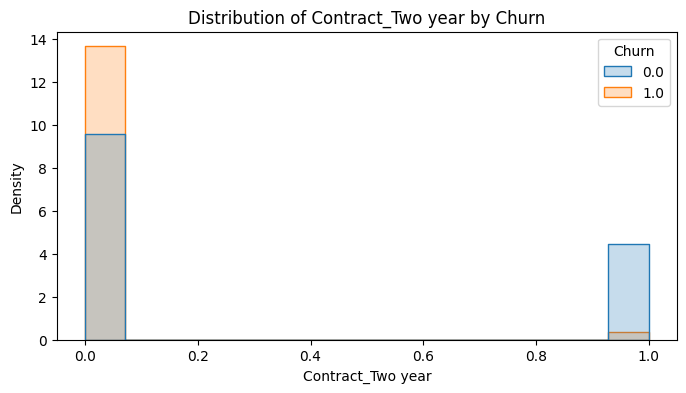

In [ ]:
# Secondly,I am Using  distribution plots to delve into how each feature's distribution differs
# for those who churn versus those who don't

# Visualizing the distribution of individual features
for column in churn_data.columns:
    if column != 'Churn':
        plt.figure(figsize=(8, 4))

        sns.histplot(churn_data, x=column, hue='Churn', element='step', stat='density', common_norm=False)
        plt.title(f'Distribution of {column} by Churn')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()


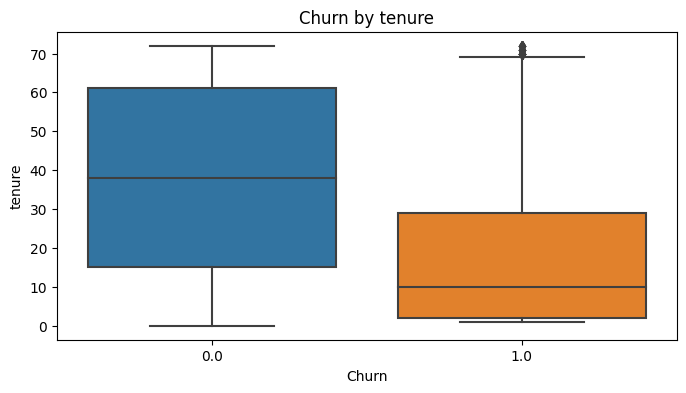

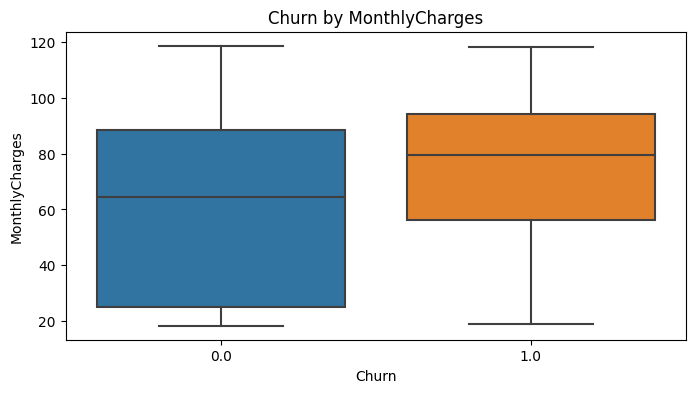

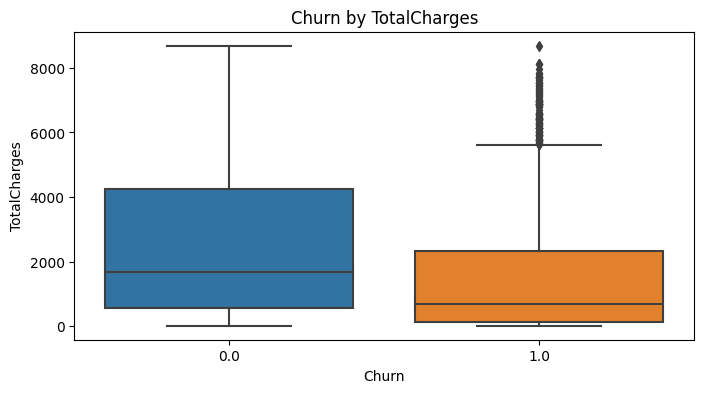

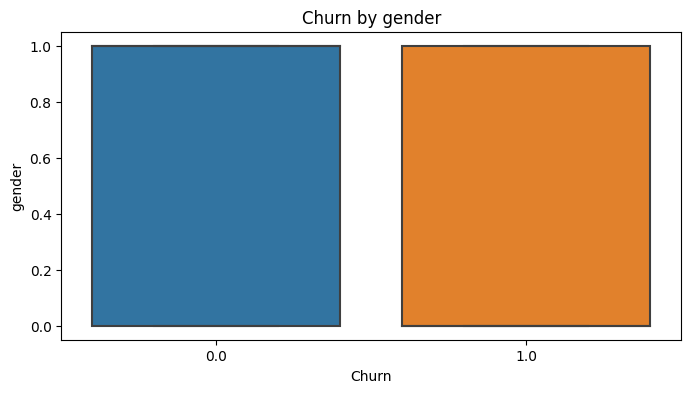

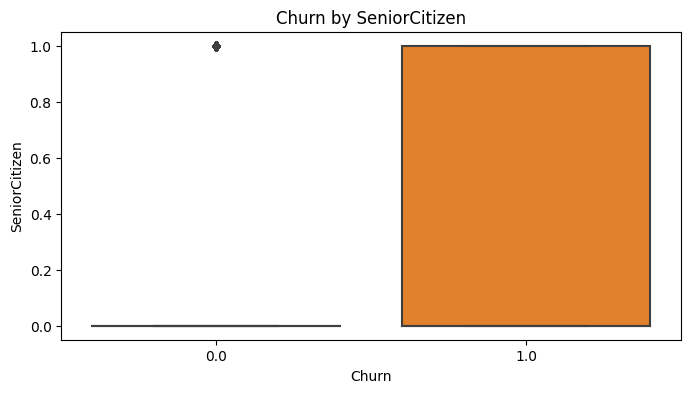

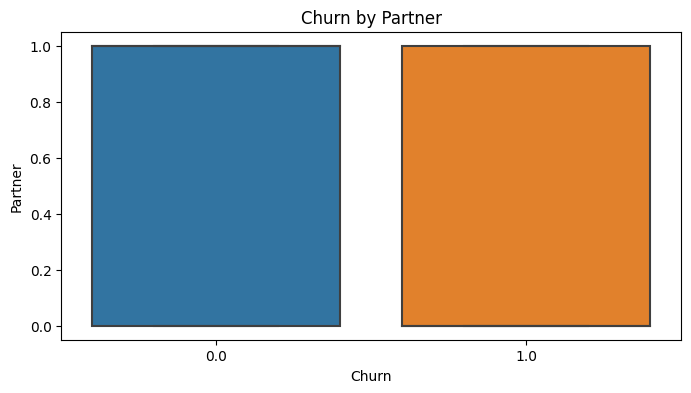

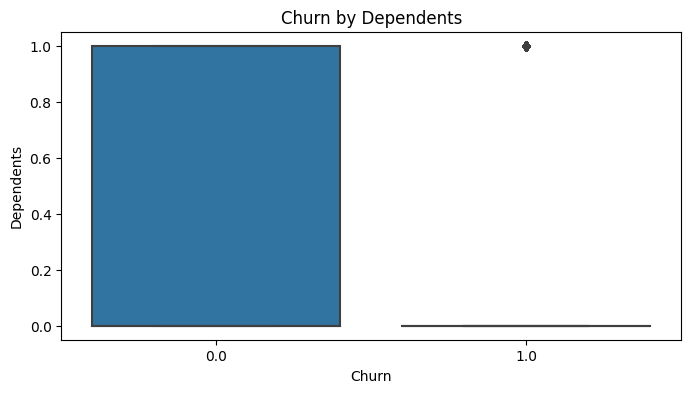

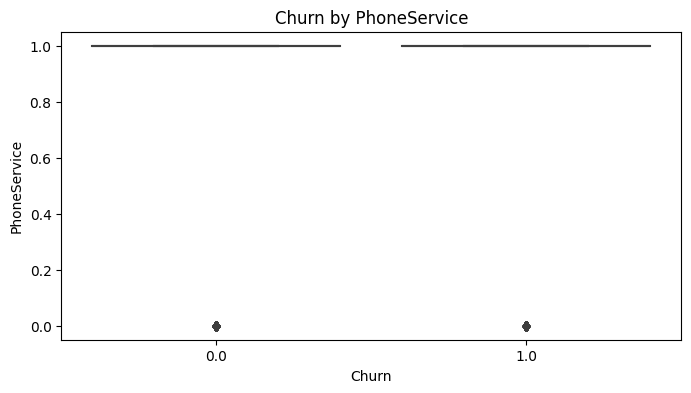

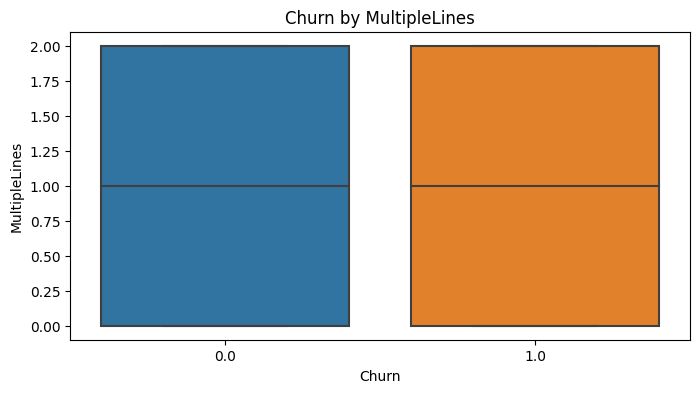

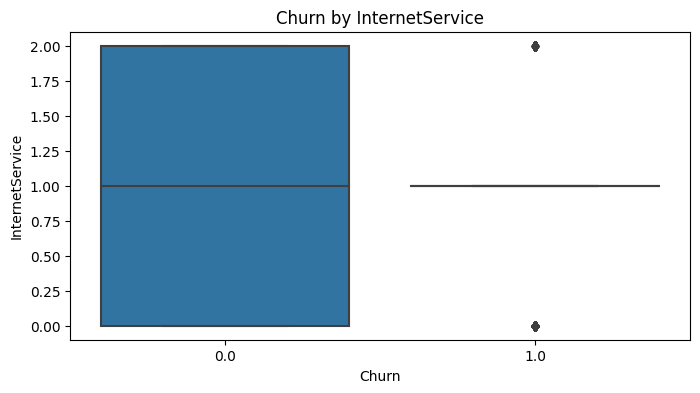

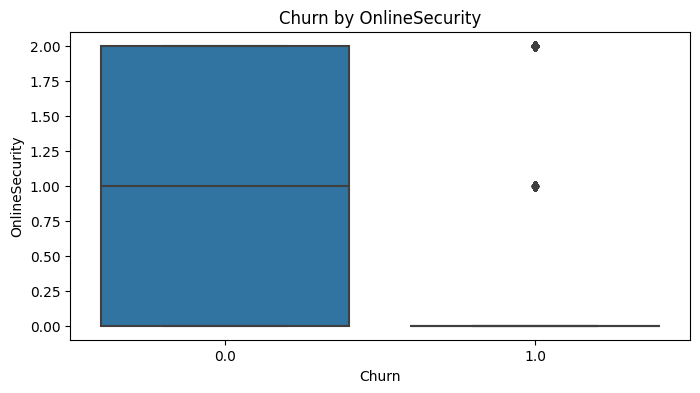

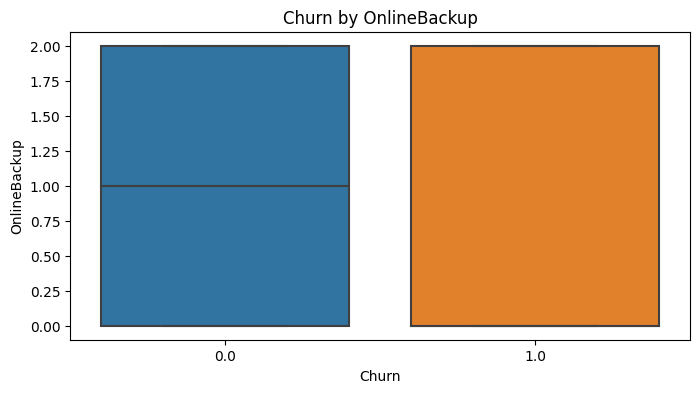

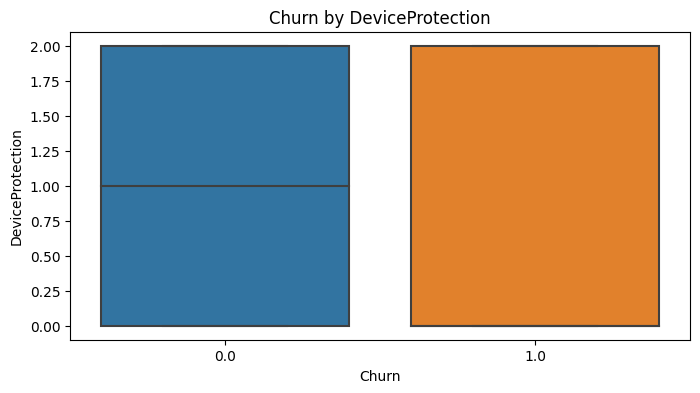

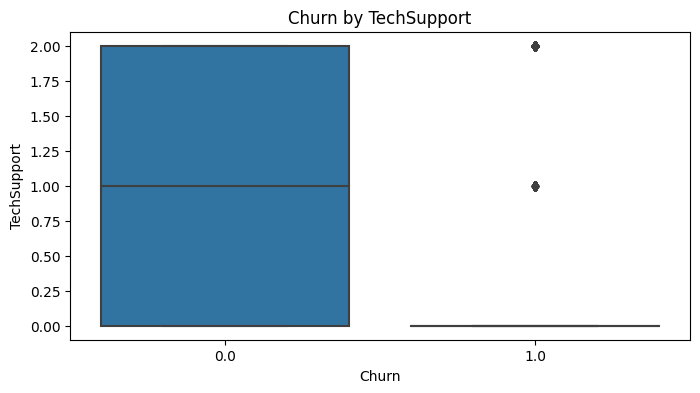

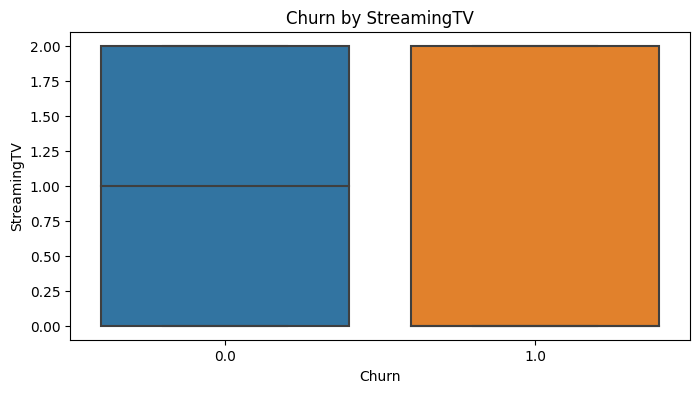

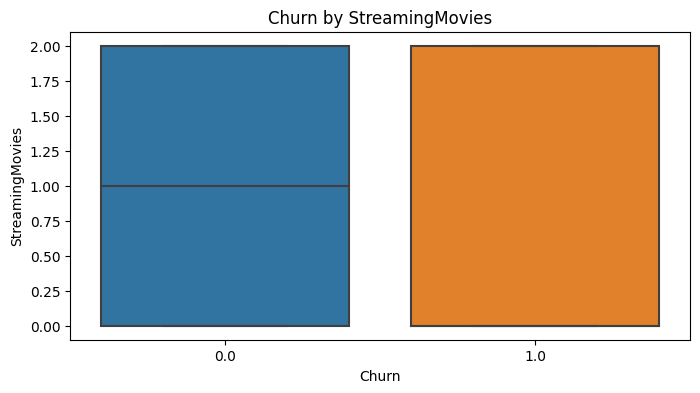

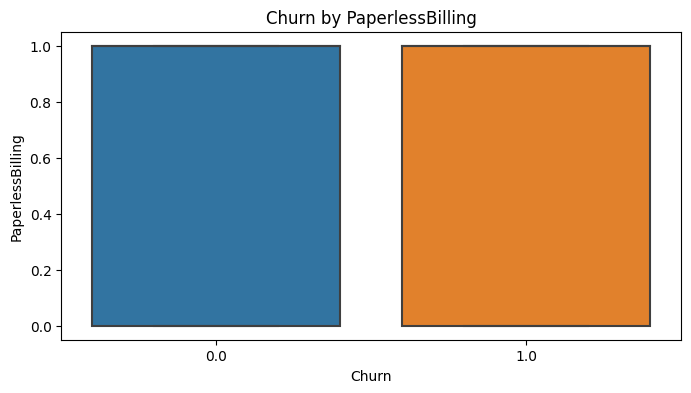

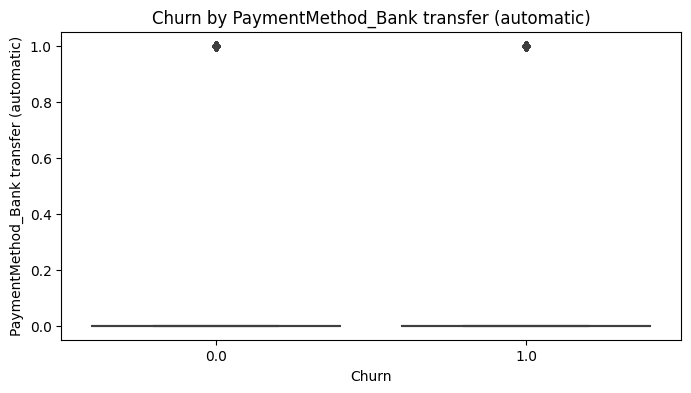

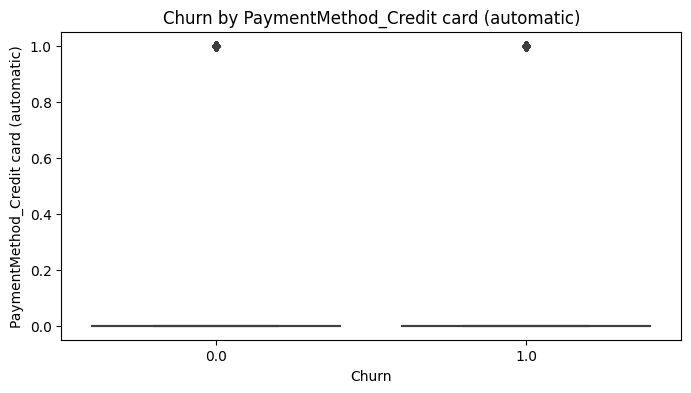

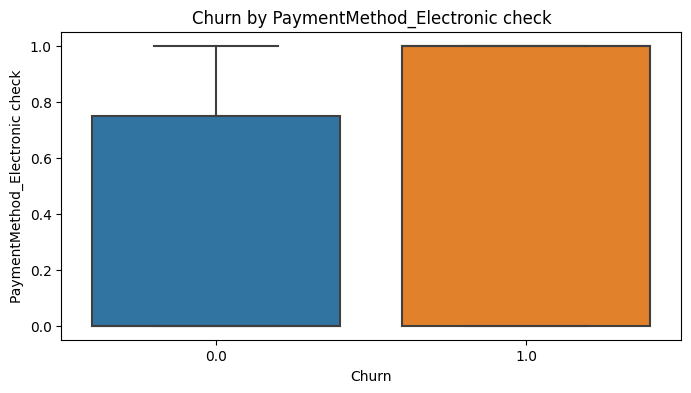

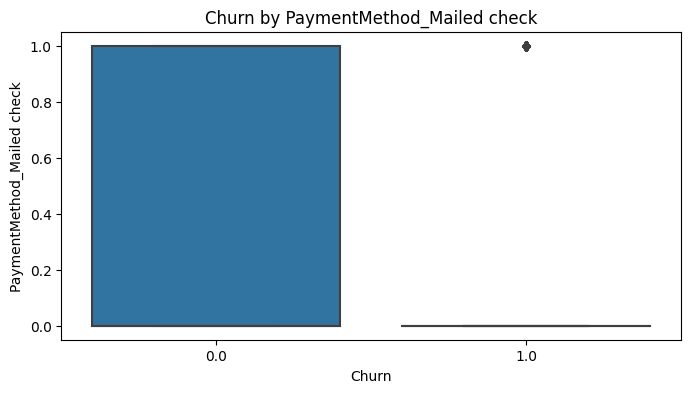

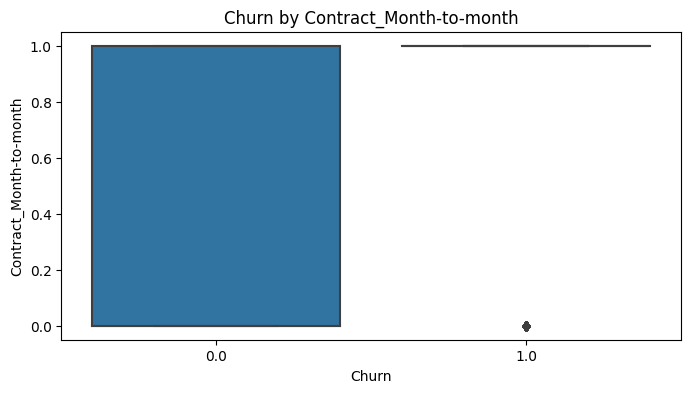

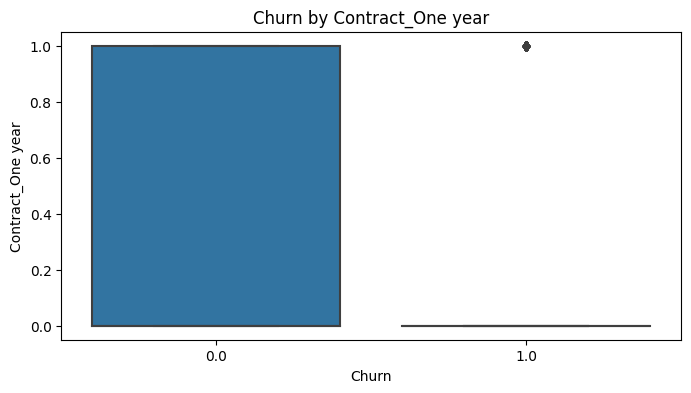

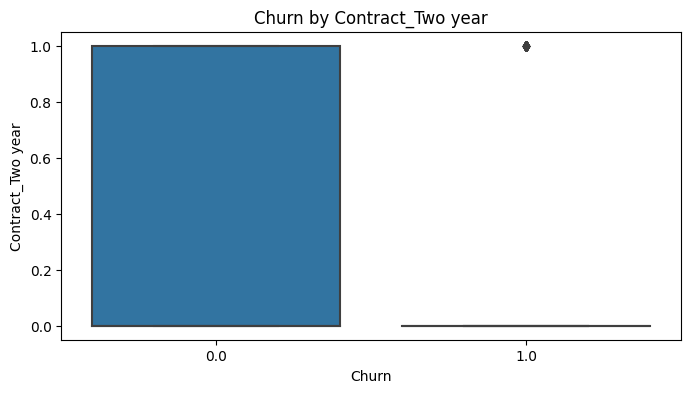

In [ ]:
# Finally, I am complementing the above visualizations with boxplots to pinpoint the statistical summaries
# And potential outliers of the distributions.
# Visualizing Individual Features

# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# As all columns except 'Churn' are numeric
for column in churn_data.columns:
    if column != 'Churn':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Churn', y=column, data=churn_data)
        plt.title(f'Churn by {column}')
        plt.xlabel('Churn')
        plt.ylabel(column)
        plt.show()

I have conducted an exploratory data analysis to uncover patterns and insights related to customer churn. Through a heatmap visualization, I found that tenure and monthly charges are notably correlated with churn, with a longer tenure suggesting greater customer retention and higher monthly charges indicating an increased risk of churn. This heatmap served as a strategic overview, guiding me to specific areas for detailed analysis.

I then examined histograms and distribution plots to understand the distribution of various attributes among customers who stayed versus those who left. These plots revealed that customers with a shorter tenure or higher monthly charges were more likely to churn, suggesting that early engagement and value reassessment could be key areas for improving customer retention.

The boxplots provided a clear visual summary of the central tendencies and variances of the data, particularly highlighting the differences in tenure and monthly charges between retained and churned customers. The median values indicated that customers who churn tend to have a shorter duration of service and pay more per month, confirming the trends identified in the correlation heatmap and distribution plots.

Personal attributes such as gender, age, and family status were also considered. I noticed that while gender showed no significant effect on churn, being a senior citizen or lacking a partner or dependents did correlate with higher churn rates. This insight suggested that targeted customer service and tailored plan options might effectively address the needs of these particular customer segments.

Lastly, my analysis of payment methods and contract types revealed that customers using electronic checks for payments and those on month-to-month contracts churned at higher rates. This highlighted potential friction points in the payment process and the importance of contract stability for customer retention.

In conclusion, my analysis suggests a multifaceted approach to reducing churn, focusing on competitive pricing, enhancing customer service especially for new and month-to-month customers, simplifying the payment process, and promoting longer contract commitments. By addressing these key factors, a company could potentially increase customer loyalty and decrease churn rates.

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
pip install --upgrade scikeras

In [ ]:
pip install --upgrade keras==2.12.0

**Question 3: Using the features in (1) define and train a Multi-Layer Perceptron model using the Functional API**

*Firstly, I am Preparing the Data, Splitting into Train and Test Sets, and Defining a Multi-Layer Perceptron (MLP) Model with User-Defined Hidden Layers and Activation Functions for Binary Churn Classification*

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


X = data[selected_features]
y = data['Churn']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def create_mlp_model(hidden_layer_sizes=[64, 32], activation='relu'):
    # Defining the input layer.
    input_layer = Input(shape=(X_train.shape[1],))

    # Initializing 'x' with the input layer.
    x = input_layer

    # Iteratively adding hidden layers.
    # The number of layers and their respective neurons are defined in 'hidden_layer_sizes'.
    for layer_size in hidden_layer_sizes:
        x = Dense(layer_size, activation=activation)(x)

    # Defining the output layer.
    # Using a single neuron with sigmoid activation.
    output_layer = Dense(1, activation='sigmoid')(x)

    # Creating the model.
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compiling the model with the 'adam' optimizer and 'binary_crossentropy' loss function.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Creating the KerasClassifier with the create_mlp_model function
model = KerasClassifier(build_fn=create_mlp_model, epochs=100, batch_size=10, verbose=0)

<ipython-input-114-1c215f3db6e9>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_mlp_model, epochs=100, batch_size=10, verbose=0)


*Secondly, I am Writing the Defined Custom Multi-Layer Perceptron (MLP) Model, Created Using the Functional API, to a File*

In [ ]:
%%writefile create_mlp_model.py
def create_mlp_model(hidden_layer_sizes=[64, 32], activation='relu'):
    # Defining the input layer.
    input_layer = Input(shape=(X_train.shape[1],))

    # Initializing 'x' with the input layer.
    x = input_layer

    # Iteratively adding hidden layers.
    # The number of layers and their respective neurons are defined in 'hidden_layer_sizes'.
    for layer_size in hidden_layer_sizes:
        x = Dense(layer_size, activation=activation)(x)

    # Defining the output layer.
    # Using a single neuron with sigmoid activation.
    output_layer = Dense(1, activation='sigmoid')(x)

    # Creating the model.
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compiling the model with the 'adam' optimizer and 'binary_crossentropy' loss function.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

Overwriting create_mlp_model.py


*Thirdly, I am downloading the Custom MLP Model Architecture Definition to a File ('create_mlp_model.py') for Future use*

In [ ]:
from google.colab import files
files.download('create_mlp_model.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Fourthly, I am Performing Hyperparameter Tuning using Grid Search with Cross-Validation to Optimize the Architecture and Training of the MLP Model*

In [ ]:
# Defining the grid search parameters
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'batch_size': [10, 20, 40],
    'epochs': [10, 50, 100],
    'activation': ['relu', 'tanh'],
    'epochs':[10,20]
}

# Creating a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=1)  # Set n_jobs to 1

# Fitting the grid search to the data
grid_search.fit(X_train,y_train)

59/59 [==============================] - 0s 1ms/step


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7b584c0f19f0>,
             n_jobs=1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [10, 20, 40], 'epochs': [10, 20],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)]},
             scoring='accuracy')

*Finally, I am Evaluation and Retraining the Best MLP Model: Assessing Accuracy, Extracting Best Hyperparameters, and Calculating the Area Under the ROC Curve (AUC). Answering alongsdie* **Question 4**

**Question 4 :Evaluate the model’s accuracy and calculate the AUC score**



In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the best model: {accuracy}")

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
# Step 1: Extracting best parameters and separate them
best_params = grid_search.best_params_
model_params = {k: v for k, v in best_params.items() if k not in ['batch_size', 'epochs']}
training_params = {k: v for k, v in best_params.items() if k in ['batch_size', 'epochs']}

# Step 2: Creating a new model instance using the structural parameters
new_model = create_mlp_model(**model_params)

# Step 3: Training the model using the training parameters
new_model.fit(X_train, y_train, **training_params)

#new_model.predict outputs probabilities
new_prob_predictions = new_model.predict(X_test)

# Converting probabilities to binary class labels for accuracy
new_class_predictions = (new_prob_predictions > 0.5).astype(int)
new_accuracy = accuracy_score(y_test, new_class_predictions)
print(f"Accuracy of the retrained model: {new_accuracy}")

# Using probabilities directly for AUC
new_auc_score = roc_auc_score(y_test, new_prob_predictions)
print(f"AUC Score of the retrained model: {new_auc_score}")



45/45 [==============================] - 0s 2ms/step
Accuracy of the best model: 0.8161816891412349
Best parameters: {'activation': 'relu', 'batch_size': 40, 'epochs': 10, 'hidden_layer_sizes': (100,)}
Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 0.4676 - accuracy: 0.7737
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7952
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7994
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8010
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8035
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8046
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8040
Epoch 8/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.804

In [ ]:
import pickle
# Using pickle to save the trained model
with open('new_leslie_model.plk', 'wb') as f:
    pickle.dump(new_model,f)

In [ ]:
import joblib
from joblib import dump
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']